In [1]:
import numpy as np
import scipy 
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import re
import html
from itertools import chain
from glob import glob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics 
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

# Question 1 Data Cleaning

In [225]:
#remove '\n' from unclassified_tweets.txt for preparing furture use
tweets = open("unclassified_tweets.txt", "r")
lines = [line for line in tweets]
data_new = [word for word in lines if word != '\n']
data = ' '.join(data_new)
#print (data_new)
with open('unclassified_tweets.txt', 'w') as out:
    out.writelines(data_new)
#Save the changed data to original file

###### All characters in the text are in lowercase

In [226]:
file = open('unclassified_tweets.txt', 'r')
        
lines = [line.lower() for line in file]
#print(lines)
with open('unclassified_tweets.txt', 'w') as out:
    out.writelines(lines)

###### All html tags and attributes (i.e., /<[^>]+>/) are removed.

In [227]:
#Function for removing html tags and attribute
def rm_html(data): 
    data = re.sub('<[^>]+>', '', data) #regexp for html tags and attributes
    return data
#test = str('Well he is [] just a #liberal after all. &amp; if thats the intellect you want to spend a vote on, dont waste the paper.')
#print(rm_html(test))

###### Html character codes (i.e., &...;) are replaced with an ASCII equivalent.

In [228]:
#Function for replacing html character codes with an ASCII equivalent
def ascii_rplc(data):
    data = html.unescape(data)
    return data
#test = str('Suzy &amp; John, &quot;, \n')
#print(ascii_rplc(test))

###### All URLs are removed.

In [229]:
#Function for removing URLs
def rm_URL(data):
    data = re.sub('\s+\S+.[^\s]+/\S+',' ', data) #RegExp for URL
    return data
# test = str('justin #trudeaus reasons for thanksgiving. todays montreal@themoment blog at bit.ly/1jqkfwr  #elxn42 poll #quebec #montreal')
# test = rm_URL(test)
# print(test)

###### All stopwords are removed. Be clear in what you consider as a stopword. All stopwords removed: well liberal intellect spend vote waste paper

In [230]:
def remove_stop_words(data):
    
    fstop = open('stop_words.txt','r')  # open the stop words file
    lines = fstop.readlines()  # read each line of stop_words file
    newlines = [line.replace('\n','') for line in lines]  # replace '\n' in each line
    fstop.close()  
    words = data.split()  # convert the string into list
    data_new = [word for word in words if word not in newlines]  
    # removing stop words
    data = ' '.join(data_new)  # covert the list back to string
    
    return data   
        

In [231]:
file = open('unclassified_tweets.txt','r+')  # Open the file with read and write permit
line = file.readline() # Read the first line
line_html = rm_html(line) #removing html tags
line_ascii = ascii_rplc(line_html) #replacing to ascii
line_url = rm_URL(line_ascii) #removing URL
line2 = remove_stop_words(line_url) #removing Stop words
lines = line2
#print(line)
while len(line)>0:  # If the line is not empty keep reading one line each time till the file is empty
    line = file.readline()  # read the rest of lines
    #print(line)
    line_html = rm_html(line)
    line_ascii = ascii_rplc(line_html)
    line_url = rm_URL(line_ascii)
    line2 = remove_stop_words(line_url)
    #Same as above but for the rest of lines
    lines += '\n' + line2 #split each tweet by '\n'
    #print(len(lines))
    #if not len(line) : break
    #print(lines)
with open('unclassified_tweets2.txt', 'w') as out:
    out.writelines(lines)
#
#print(lines)
file.close()

# Questions 2 Exploratory Analysys

###### Party Determining

 #Algrithm to filter the tweet. Firstly we get the number of the hashtag mentioned in the tweet, then identify the party. 
 #Each tweet should belongs to only one party, whose name be returned.
 #If one party mentioned sequences are greater than other party, that party's name will be returned.
 #If the frequency of different parties are the same, or the frequency is none, the return value would be other, which means that tweet belongs to no party.

In [233]:
def party_det(data):
    # finished process the data input into the string with only alnum and # 
    lpctag = {'#realchange': 1, '#justin': 1, '#trudeau': 1, '#justintrudeau': 1,
              '#liberal': 1, 'LPC': 1, '#teamtrudeau': 1, '#trudeaus': 1} #tags for Liberal
    cpctag = {'#conservatives': 1,'#CPC': 1,'#conservative': 1} #Tags for Conservative
    ndptag = {'#NDP': 1,'#mulcair': 1,'#ptndp': 1,'#ndp': 1} #Tags for NDP
    othertag = {'#green': 1,'#freedom': 1} #Tags for others
    lpc = 0
    cpc = 0
    ndp = 0
    other = 0 

    for j in data.split():
        other = other + othertag.get(j,0)+1 
        lpc = lpc + lpctag.get(j,0)+1
        cpc = cpc + cpctag.get(j,0)+1 
        ndp = ndp + ndptag.get(j,0)+1
        
    if other > max(lpc, cpc, ndp) or lpc == max(other, cpc, ndp) or cpc == (lpc, other, ndp) or ndp == max(lpc, cpc, other):
        return 'others' 
        
    elif lpc > max(other,cpc,ndp) and lpc != max(other,cpc,ndp):     
        return 'Liberal'  
        
    elif cpc > max(other,lpc,ndp) and cpc != max(other,lpc,ndp):     
        return 'Conservative'
        
    elif ndp > max(other,lpc,cpc) and ndp != max(other,lpc,cpc):     
        return 'NDP'

Ploting of distribution of unclassified data

2273 399 103 303


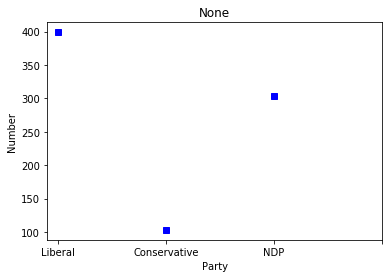

In [235]:
file = open('unclassified_tweets.txt','r+')  # Open the file with read and write permit
line = file.readline() # Read the first line
party_type = party_det(line)
party_list = []
party_list.append(party_type)
#print(type(party))
while len(line)>0:  # If the line is not empty keep reading line one at a time till the file is empty
    line = file.readline() # Read the first line
    party_type = party_det(line)
    party_list.append(party_type)
    #print(party_type)
#print(party_list)
other_num = party_list.count('others')
lpc_num = party_list.count('Liberal') #number of Liberal tweets
cpc_num = party_list.count('Conservative') #number of CPC tweets
ndp_num = party_list.count('NDP') #number of NDP tweets
print (other_num,lpc_num, cpc_num, ndp_num)
y = [lpc_num, cpc_num, ndp_num]

plt.plot(y, 'bs')
plt.xlabel('Party')
plt.ylabel('Number')
plt.xticks(index, ( 'Liberal', 'Conservative', 'NDP'))
plt.title(None)

plt.show()

Ploting of distribution of unclassified data

200002 0 0 0


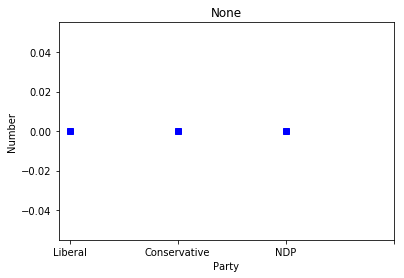

In [236]:
file = open('classified_tweets.txt','r+')  # Open the file with read and write permit
line = file.readline() # Read the first line

party_type = party_det(line[5])
#print(party_type)
party_list = []
party_list.append(party_type)
#print(type(party))
while line:  # If the line is not empty keep reading line one at a time till the file is empty
    line = file.readline() # Read the first line
    party_type = party_det(line)
    #print(party_type)
    party_list.append(party_type)
    #print(party_type)
#print(party_list)
other_num = party_list.count('others')
lpc_num = party_list.count('Liberal')
cpc_num = party_list.count('Conservative')
ndp_num = party_list.count('NDP')
print (other_num,lpc_num, cpc_num, ndp_num)
y = [lpc_num, cpc_num, ndp_num]

plt.plot(y, 'bs')
plt.xlabel('Party')
plt.ylabel('Number')
plt.xticks(index, ( 'Liberal', 'Conservative', 'NDP'))
plt.title(None)

plt.show()

# Question 3 Model Preparation

###### !!! This step will take around 10-20 min due to two while loop, please be patient.
###### Thanks!!! I just don't have enought time to optimize the algorithm.

In [2]:
#Word frequency counting function, it returns a list of count for each word from a tweet.
def word_frequency(data):
    data_sp = data.split() #split data to words
    file = open('corpus.txt', 'r+')
    line = file.readline()
    wd_count = [] #list of count of each words
    word = line.split() #split line to words list
    count = data_sp.count(word[0])
    wd_count.append(count) #add count of each words to the list
    while line:
        line = file.readline()
        word = line.split()
        if len(word):
            count = data_sp.count(word[0])
            #print(count)
            wd_count.append(count)
            #print(wd_count.append(count))
    #print (test)
    return wd_count #return the final list for one tweet
    f.close()

In [3]:
#This step will run word frequency function for each tweet from classified 
file = open('classified_tweets.txt','r+')  # Open the file with read and write permit
line = file.readline() # Read the first line
line_sp = line.split(',')
wd_fq = word_frequency(line)
feature = []
#we don't add the first line because it is the title
#print(feature)
while line:  # If the file is not empty keep reading line one at a time till the file is empty
    line = file.readline()  # read the rest of the line
    wd_fq = word_frequency(line)
    feature.append(wd_fq)
    #print(wd_fq)
file.close()

In [245]:
feature_a = np.asarray(feature[:-1]) 
#to keep the size of feature same to target
#I have to remove the output due to the last line of classified.data file
#which is '\n' without target
print(len(feature_a))

200000


In [133]:
#print(feature_a)

In [246]:
#obtaining target data from calssified tweets & save it into an array
df = pd.read_csv('classified_tweets.txt',  usecols=["class"])
target_df = df.iloc[:,0]
target = target_df.as_matrix()
#print(len(target))

###### Split both feature and target data into traininng data(70%) and testing data(30%)

In [247]:
feature_train, feature_test, target_train, target_test = train_test_split(feature_a, target, test_size=0.3, stratify = target)
#print (feature_train, feature_test, target_train, target_test)
#print(len(feature_train),len(target_train))

# Question 4 Logistic Regression

In [248]:
logistic_regression = LogisticRegression()

logistic_regression_model = logistic_regression.fit(feature_train, target_train)
test_target_pred = logistic_regression_model.predict(feature_test)
train_target_pred = logistic_regression_model.predict(feature_train)
train_scores = metrics.accuracy_score(target_train, train_target_pred) #accuracy of training data
test_scores = metrics.accuracy_score(target_test, test_target_pred) #accuracy of testing data

print(test_target_pred, train_target_pred, train_scores,test_scores)

[4 4 4 ..., 0 0 0] [4 0 0 ..., 4 4 4] 0.66325 0.65545


In [238]:
file = open('unclassified_tweets2.txt','r+')  # Open the file with read and write permit
line = file.readline() # Read the first line
line_sp = line.split(',')
wd_fq = word_frequency(line)
feature_un = []
feature_un.append(wd_fq)
#we add the first line because there is no title in unclassified data
#print(feature)
while line:  # If the file is not empty keep reading line one at a time till the file is empty
    line = file.readline()  # read the rest of the line
    wd_fq = word_frequency(line)
    feature_un.append(wd_fq)
    #print(wd_fq)
file.close()

In [239]:
#feature from unclassified data
feature_b = np.asarray(feature_un)

In [240]:
#predict result for unclassifited data by logistic regression model
unclassfied_predict = logistic_regression_model.predict(feature_b)
print(unclassfied_predict) 

pos_n = np.count_nonzero(unclassfied_predict)
print('pos',pos_n, 'neg',len(unclassfied_predict)-pos_n) #number of positive tweet & number of negative tweet

[4 4 0 ..., 4 4 4]
pos 2762 neg 318


# Question 5 Discussion

#Q2: From the analysis & gragh in Quesiton 2, except the tweets cannot be identity to a specific party, it can be seen that Justin Trudeau and Liberty party have the most distribution of the political affiliations in tweets data. However, in classified tweet file, seems like not everyone talks about the politics. 
#Q4: The accuracy of the model is 66%
#Q5: From the graph in Q2, we can see that the poplulation of people talking about Liberal is even greater than the sum of population of people talking about both NDP and Conversetive. This phenomenon matches the result of 2015 election, Liberal won the election and JT became the new PM. What's more, from the prediction of unclassified tweet, it shows more tweet are positive sentiment(89%), only fewer people have negative sentiment(11%). Which means most people have positive attitude to this election. 

# Bonus

Predict unclassified tweet with Gaussian Naive Bayes algrithm

In [223]:
gnb = GaussianNB()
y_pred = gnb.fit(feature_train, target_train).predict(feature_b)
print (y_pred)

[4 4 0 ..., 4 4 4]
